## This notebook is designed to obtain quick analytical responses for N single photon consecutive Mach-Zehnder interferometers with equal semitransparent objects in one of their arms, details on the theory can be found in [link to my thesis when it is done], as the reference shows this quantum optics problem is reduced to matrix multiplication

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

# Let us now define the symbols we will use for this calculation, we will first illustrate how the notebook works with N=4, we will expose the final code where N is an input

In [2]:
init_printing(use_unicode=True)
theta1, theta2, theta3,theta4,gamma1,gamma2,gamma3,gamma4= symbols('theta1 theta2 theta3 thetha4 gamma1 gamma2 gamma3 gamma4 ',real=True)
beta=Symbol('beta')

# Let us begin by defining 4 BS matrices with Different $\theta$, on why we use this matrix can be found in my thesis [luego la a;ado es la uno], we will also define general mirrors to model dephasing,

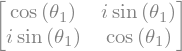

In [3]:
BS1=Matrix([[cos(theta1),I*sin(theta1)],[I*sin(theta1),cos(theta1)]])
BS2=Matrix([[cos(theta2),I*sin(theta2)],[I*sin(theta2),cos(theta2)]])
BS3=Matrix([[cos(theta3),I*sin(theta3)],[I*sin(theta3),cos(theta3)]])
BS4=Matrix([[cos(theta4),I*sin(theta4)],[I*sin(theta4),cos(theta4)]])
BS1

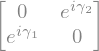

In [4]:
M1=Matrix([[0,exp(I*gamma2)],[exp(I*gamma1),0]])
M1

# We will use a non-unitary matrix to represent our imperfect absorber just like in the paper by H. Azuma [2](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.74.054301)

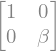

In [5]:
A=Matrix([[ 1,0],[0,beta]])
A

# Here we define our vector basis we will use the computational basis as explained in the reference [1]

In [6]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])
jones1

# We can get our final state (minus the aborption part that will be found substracting from unity) by simply permorming the matrix multiplication 

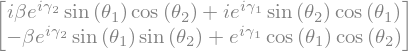

In [7]:
r=BS2*M1*A*BS1*jones0
r

# Then we can find the probabilities because as described in [2], the probabilities are given by $P_{D_{i}}=|\left\langle{i}\right|BS_{2} Mirrors BS_{1} \left|{initial}\right\rangle|^{2}$, where initial can be either of the states in our basis in this notebook we will use the first state as initial this can be changed in the above equation replacing jones0 by jones1

In [9]:
p1=jones0.T*r
p1=p1[0]*conjugate(p1[0])
#p1=simplify(re(p1))
p1

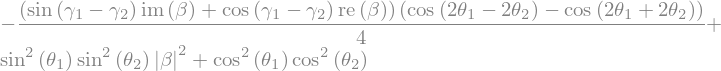

In [9]:
p2=jones1.T*r
p2=p2[0]*conjugate(p2[0])
p2=simplify(re(p2))
p2

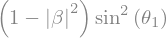

In [10]:
pabs=1-p1-p2
pabs.simplify()

# By using $1-\cos^{2}(\theta)$,$(re(a)=re(a*))$ and $\cos(A-B)-\cos(A+B)=2\sin(A)\sin(B)$ we arrive at the exact same result derived by zurika [referencia](#), probing this approach works (I'm working to get the exact same simplification from the code), I will insert graphs fot the probabilities here later, We can now do the same for N Beam splitters(in the program K=1 means different $\theta$):

In [10]:
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=Symbol('theta1',real=True)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
        


In [13]:
def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[0,exp(I*gamma2)],[exp(I*gamma1),0]])
    A=Matrix([[ 1,0],[0,beta]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        


# Let us test this program for N=2

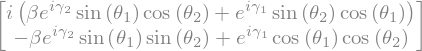

In [14]:
N_mach_zehnder(2,1)

# Now let us write our final function and test it:

In [14]:
def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

    

In [15]:
pabs,pd1,pd2,K=N_Interferomemer(2,1)

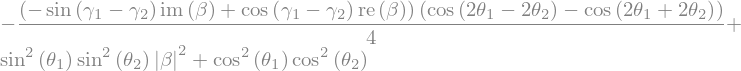

In [16]:
pd1=simplify(pd1)
pd1

In [17]:
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


<IPython.core.display.Javascript object>


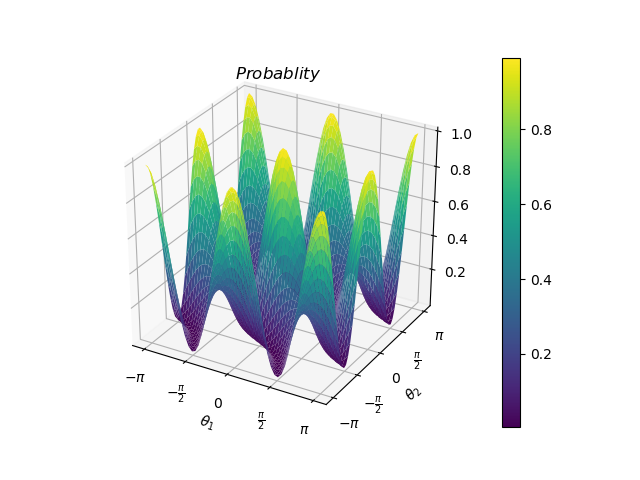

<IPython.core.display.Javascript object>


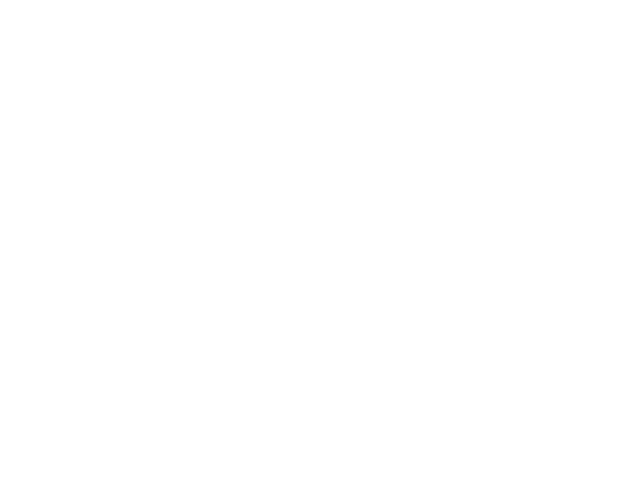

In [18]:

plot1 = plot3d(pd1.subs({beta:0.5, gamma1: 0,gamma2:2*pi}),(K[1],-pi,pi),(K[2],-pi,pi),xlabel=r'$\theta_{1}$'
               ,ylabel=r'$\theta_{2}$',title=r'$Probablity$',show=False)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

backend = plot1.backend(plot1)
backend.ax = ax
backend._process_series(backend.parent._series, ax, backend.parent)
plt.close(backend.fig)
ax.collections[0].set_cmap('viridis') # optionally change the colormap
plt.colorbar(ax.collections[0],ticks=[0,0.2,0.4,0.6,0.8,1.0])
plt.xticks(np.arange(-np.pi,np.pi+1 , step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
plt.yticks(np.arange(-np.pi,np.pi+1 , step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()


In [45]:
pabs,pd1,pd2,K=N_Interferomemer(5,1)

<IPython.core.display.Javascript object>


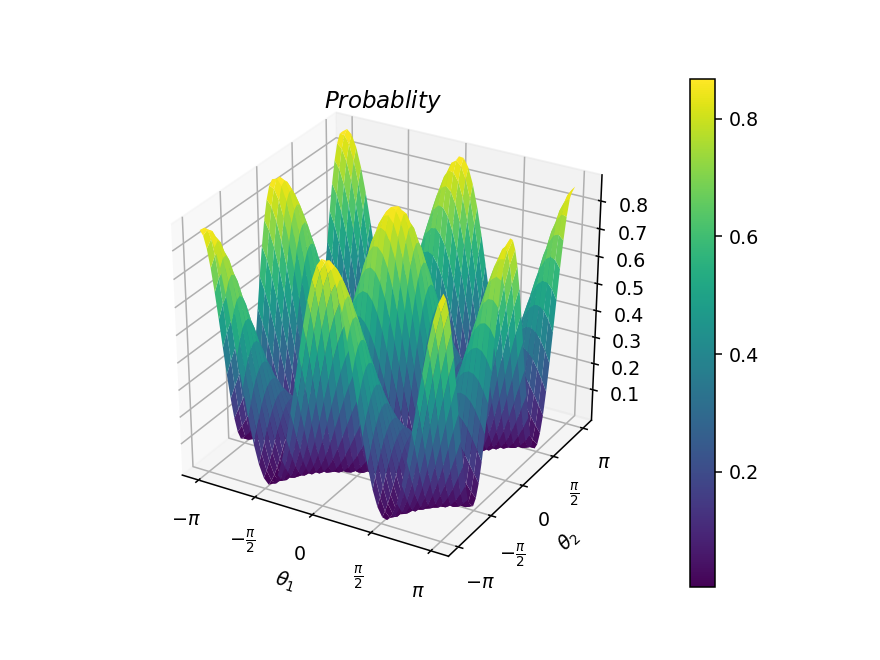

<IPython.core.display.Javascript object>


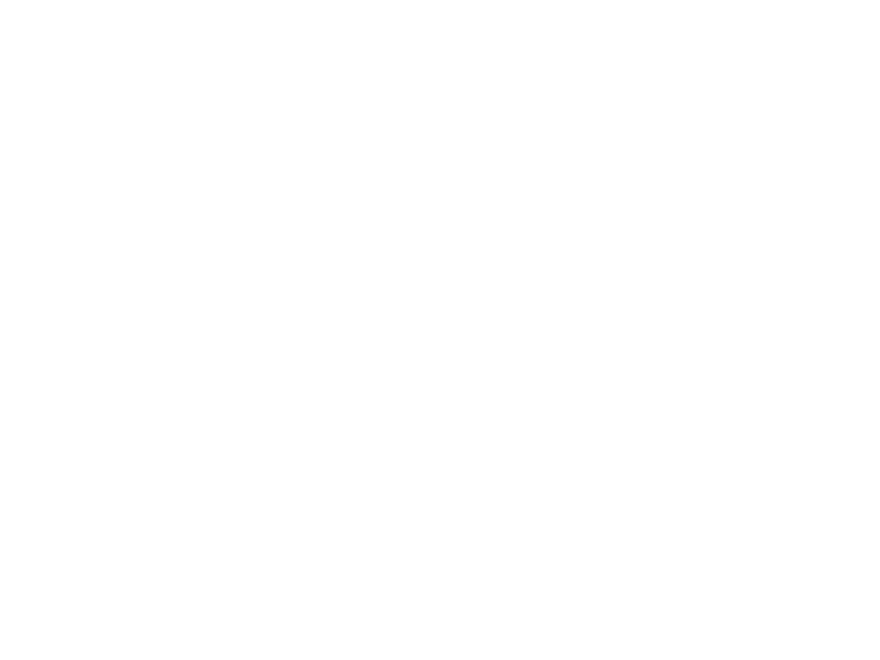

In [56]:
plot1 = plot3d(pd1.subs({beta:0.5, gamma1: 0,gamma2:pi,K[1]:pi/10,K[2]:pi/10,K[3]:pi/10}),(K[4],-pi,pi),(K[5],-pi,pi),xlabel=r'$\theta_{1}$'
               ,ylabel=r'$\theta_{2}$',title=r'$Probablity$',show=False)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

backend = plot1.backend(plot1)
backend.ax = ax
backend._process_series(backend.parent._series, ax, backend.parent)
plt.close(backend.fig)
ax.collections[0].set_cmap('viridis') # optionally change the colormap
plt.colorbar(ax.collections[0],ticks=[0,0.2,0.4,0.6,0.8,1.0])
plt.xticks(np.arange(-np.pi,np.pi+1 , step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
plt.yticks(np.arange(-np.pi,np.pi+1 , step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()

# Turns out simpy simplify function is terribly slow even for low values of N such as 10 it takes too long to compute, I'll make the same algorithm in mathematica and hope it goes better, I'll also try to generate plots in the same way that the Zurika article and also try symengine to speed this up if possible, Let us now see when we can assure we do not get interference with a semitransparent object, that is let us plot the probability vs $\beta$ and $\Delta$

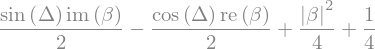

In [18]:
delta=Symbol('Delta')
pd1=pd1.subs({ K[1]: pi/4,K[2]:pi/4,gamma1-gamma2:delta})
pd2=simplify(re(pd2))
pd2=pd2.subs({ K[1]: pi/4,K[2]:pi/4,gamma1-gamma2:delta})
pd1

# This next function is just to plot a colorbar

In [65]:
def con_barra(plot):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    cbar=plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize=13)
    ax.set_xlabel(r'$\beta$',fontsize=20)
    ax.set_ylabel(r'$\Delta$',fontsize=20)
    ax.set_title(r'$P_{D_{2}}$',fontsize=25)
    plt.yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'],fontsize=13)
    ax.set_zticks([0,0.5,1],[r'$0$',r'$0.5$',r'$1$'])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(13)
    return plt.show()

# An apology because plots are repeated I'm working on fixing that

<IPython.core.display.Javascript object>


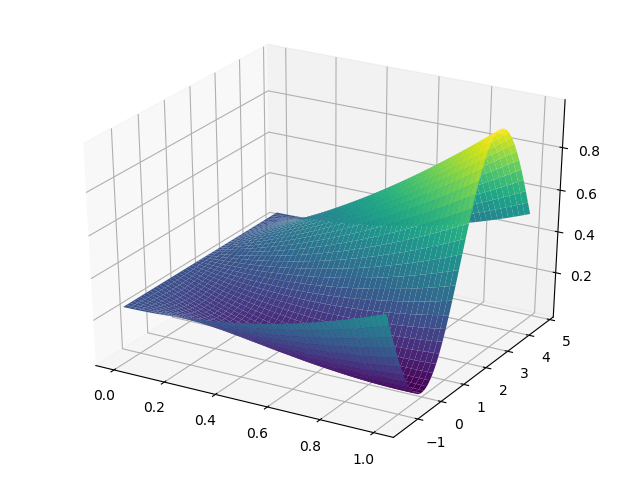

<IPython.core.display.Javascript object>


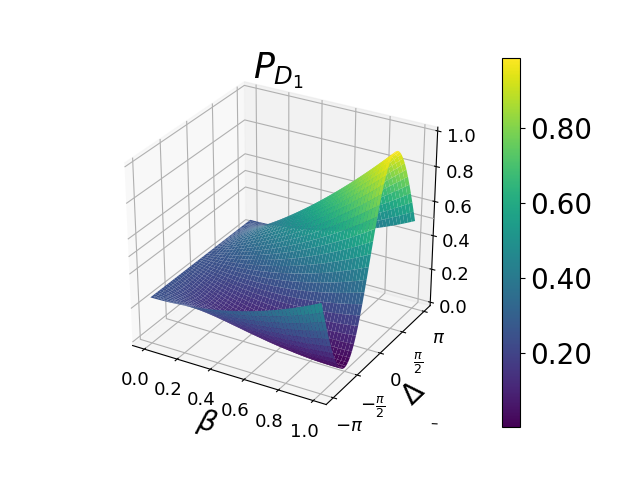

<IPython.core.display.Javascript object>


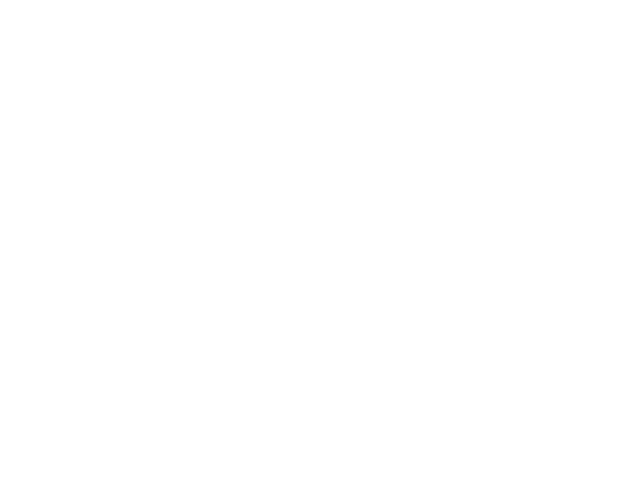

In [56]:
%matplotlib notebook
con_barra(plot3d(pd1.subs({ K[1]: pi/4,K[2]:pi/4}),(beta,0,1),(delta,-np.pi/2,3*np.pi/2)))


<IPython.core.display.Javascript object>


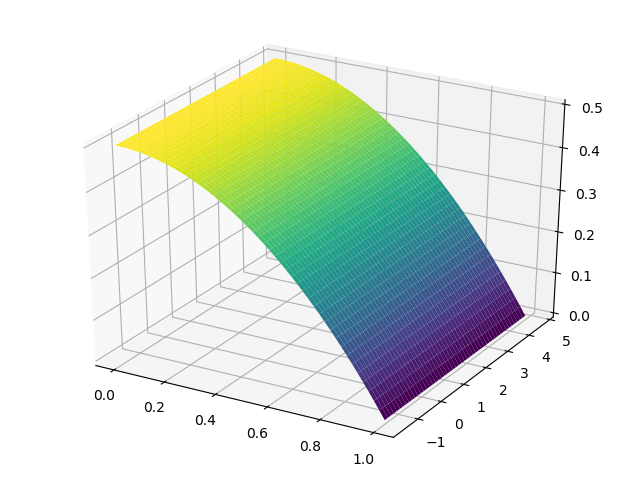

<IPython.core.display.Javascript object>


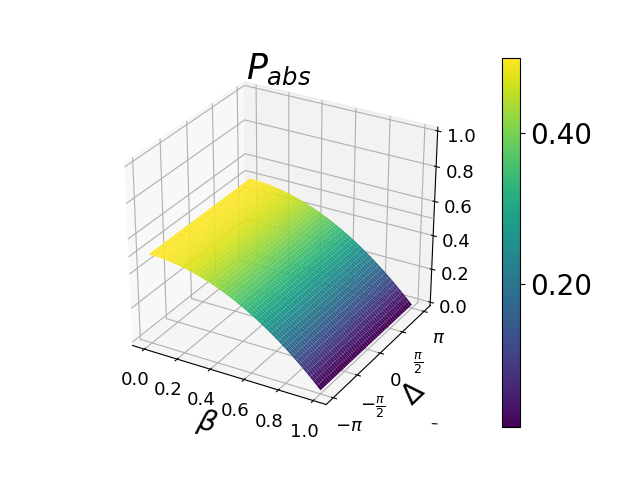

<IPython.core.display.Javascript object>


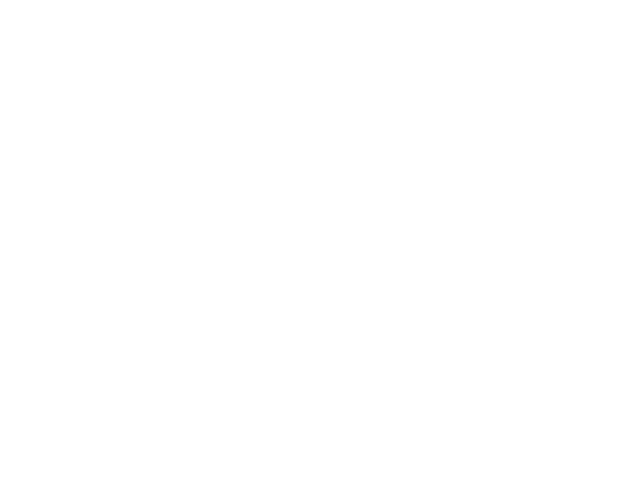

In [60]:
con_barra(plot3d(pabs.subs({ K[1]: pi/4,K[2]:pi/4}),(beta,0,1),(delta,-np.pi/2,3*np.pi/2)))

<IPython.core.display.Javascript object>


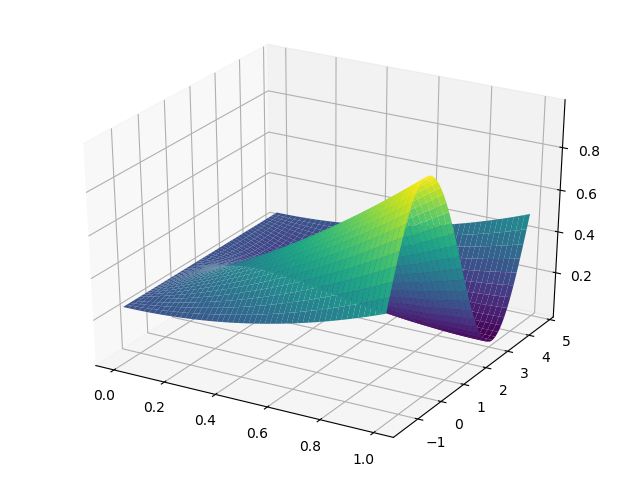

<IPython.core.display.Javascript object>


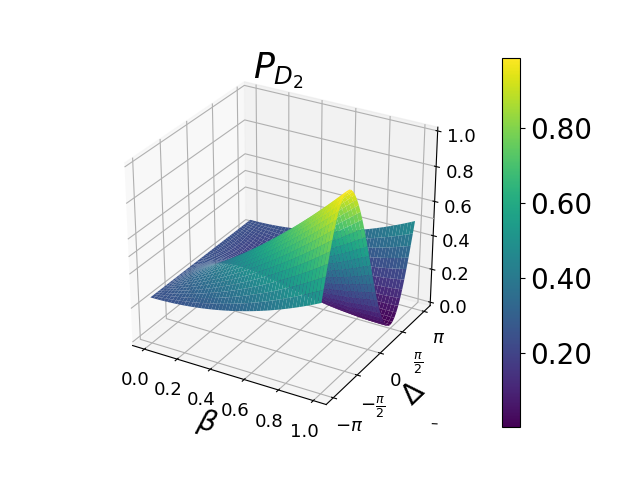

<IPython.core.display.Javascript object>


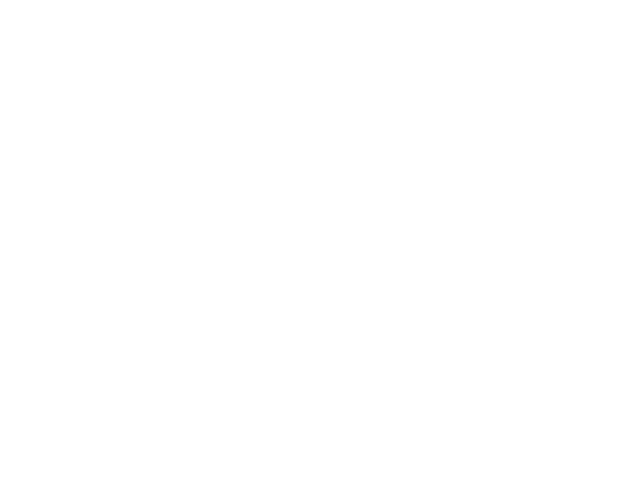

In [58]:
con_barra(plot3d(pd2.subs({ K[1]: pi/4,K[2]:pi/4}),(beta,0,1),(delta,-np.pi/2,3*np.pi/2)))

# Now let us see how this compares with Wheeler's Quantum Delayed choice experiment, where the photon can act as a wave (produce interference) or a particle (we know which path it took). These  previous Plots were obtained by Zurika Blanco-Garcia and Oscar Rosas-Ortiz in [2](https://arxiv.org/pdf/1605.01084.pdf)  and are in agreement with experiments [3](https://arxiv.org/abs/1205.4926) however they only did it for both BS being equal with $\theta=\frac{\pi}{4}$ and a single mach zehnder, in this notebook those are general and the phase of the object is encoded in $\Delta$ as well, let us see an interesting case $\theta_{1}=\theta_{2}=\frac{\pi}{3}$ for that we write a function that does all of the previous work given two angles $\theta_{1},\theta_{2}$

In [62]:

def arbitrary_angle(theta1,theta2,a):
    if a==1:
        con_barra(plot3d(pd1.subs({ K[1]: theta1 ,K[2]:theta2}),(beta,0,1),(delta,-np.pi/2,3*np.pi/2)))
    else:
        con_barra(plot3d(pd2.subs({ K[1]: theta1,K[2]:theta2}),(beta,0,1),(delta,-np.pi/2,3*np.pi/2)))


# The function takes 3 arguments the first is $\theta_{1}$, the second $\theta_{2}$ and the third is to be one if you want a $P_{D_{1}}$ plot and anything else for a $P_{D_{2}}$ plot

<IPython.core.display.Javascript object>


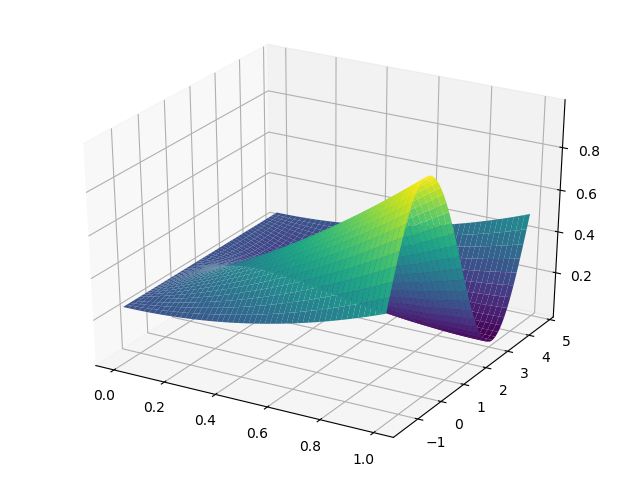

<IPython.core.display.Javascript object>


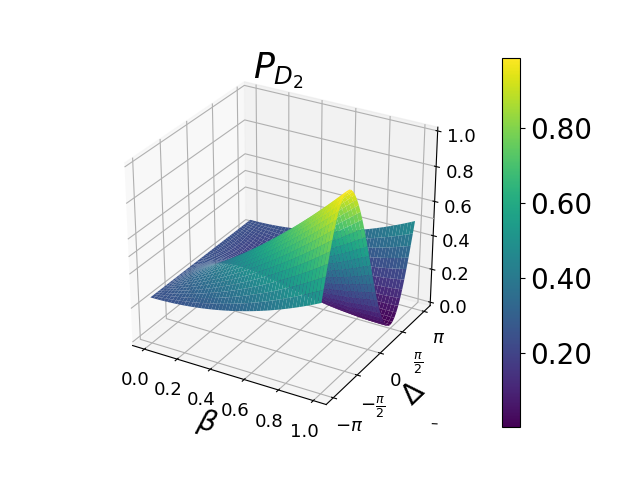

<IPython.core.display.Javascript object>


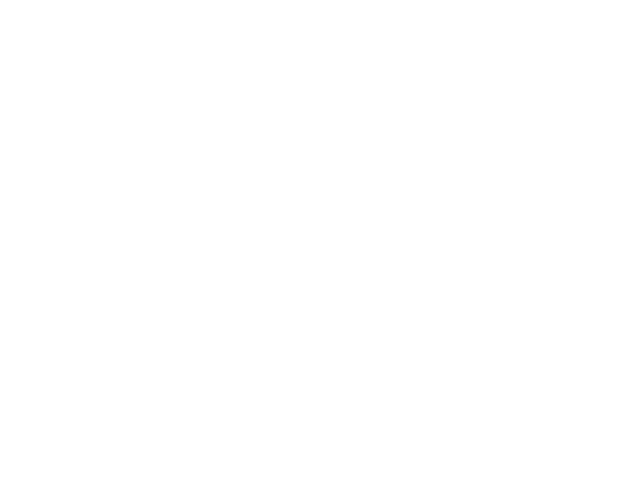

In [66]:
arbitrary_angle(np.pi/3,np.pi/3,2)

# I have I separate notebook for several Mach-Zehnder